In [1]:
import sys
sys.path.append('../lol')

import numpy as np
from lol import LOL, QOQ
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold

In [2]:
X = np.load('../../nomads/source/j1c/classifier/data/data_isotropic.npy')
y = np.load('../../nomads/source/j1c/classifier/data/gaba_label.npy')
mask = np.load('../../nomads/source/j1c/classifier/data/15_9_9_edge_mask.npy')

X = X[mask]
y = y[mask]

In [3]:
X = X.reshape((927, -1))

In [4]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

lol_lda_error = []
lol_rf_error = []

for train, test in kfold.split(X, y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    l = LOL()
    l.fit(X_train, y_train)
    components = l.components_
    
    lol_lda = []
    lol_rf = []
    for i in range(1, 101):
        X_train_transformed = X_train @ components.T[:, :i]
        X_test_transformed = X_test @ components.T[:, :i]
        
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_transformed, y_train)
        
        pred = lda.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        lol_lda.append(misclassification)
        
        rf = RandomForestClassifier()
        rf.fit(X_train_transformed, y_train)
        pred = rf.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        lol_rf.append(misclassification)
        
        print("Finished Components {}".format(i), end="\r", flush=True)
    
    lol_lda_error.append(lol_lda)
    lol_rf_error.append(lol_rf)

In [5]:
lol_lda_error = np.array(lol_lda_error)
lol_rf_error = np.array(lol_rf_error)

In [14]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

pca_lda_error = []
pca_rf_error = []

for train, test in kfold.split(X, y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    p = PCA()
    p.fit(X_train, y_train)
    components = p.components_
    
    pca_lda = []
    pca_rf = []
    for i in range(1, 101):
        X_train_transformed = X_train @ components.T[:, :i]
        X_test_transformed = X_test @ components.T[:, :i]
        
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_transformed, y_train)
        
        pred = lda.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        pca_lda.append(misclassification)
        
        rf = RandomForestClassifier()
        rf.fit(X_train_transformed, y_train)
        pred = rf.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        pca_rf.append(misclassification)
        
        print("Finished Components {}".format(i), end="\r", flush=True)
    
    pca_lda_error.append(pca_lda)
    pca_rf_error.append(pca_rf)

In [16]:
pca_lda_error = np.array(pca_lda_error)
pca_rf_error = np.array(pca_rf_error)

In [38]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

qoq_qda_error = []
qoq_rf_error = []

for train, test in kfold.split(X, y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    q = QOQ(n_components=100, svd_solver='full')
    q.fit(X_train, y_train)
    components = q.components_
    
    qoq_qda = []
    qoq_rf = []
    for i in range(1, 101):
        X_train_transformed = X_train @ components.T[:, :i]
        X_test_transformed = X_test @ components.T[:, :i]
        
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_transformed, y_train)
        
        pred = lda.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        qoq_qda.append(misclassification)
        
        rf = RandomForestClassifier()
        rf.fit(X_train_transformed, y_train)
        pred = rf.predict(X_test_transformed)
        misclassification = (pred != y_test).sum() / y_test.size
        qoq_rf.append(misclassification)
        
        print("Finished Components {}".format(i), end="\r", flush=True)
    
    qoq_qda_error.append(qoq_qda)
    qoq_rf_error.append(qoq_rf)

In [39]:
qoq_qda_error = np.array(qoq_qda_error)
qoq_rf_error = np.array(qoq_rf_error)

In [40]:
import matplotlib.pyplot as plt

In [43]:
x_range = np.arange(1, 101)
chance = np.repeat(y_test.sum() / y_test.size, 100)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_range, lol_lda_error.mean(axis=0), label='LOL + LDA')
ax.plot(x_range, lol_rf_error.mean(axis=0), label='LOL + RF')
# ax.plot(x_range, pca_lda_error.mean(axis=0), label='PCA + LDA')
# ax.plot(x_range, pca_rf_error.mean(axis=0), label='PCA + RF')
ax.plot(x_range, qoq_qda_error.mean(axis=0), label='QOQ + LDA')
ax.plot(x_range, qoq_rf_error.mean(axis=0), label='QOQ + RF')
ax.plot(x_range, chance, color='grey', label='Chance')
ax.set_title('Comparison of LOL/PCA with LDA/RF Classifier')
ax.set_xlabel('Embedded Dimensions')
ax.set_ylabel('Misclassification Rate')
ax.legend()

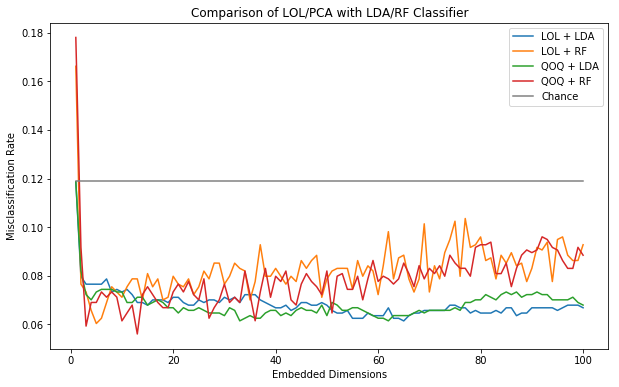

In [44]:
fig